# Brain MRI İmages With Deep Learning Application - CNN

![Brain](Brain_Tumor.jpg)

## Table Content
<ol>
    <li>Brain MRI Images with Deep Learning Application - CNN</li>
    <li>Setup</li>
    <li>Import Libraries
        <ul>
            <li>Read Data</li>
            <li>Understanding that Data is Read</li>
        </ul>
    </li>
    <li>PreProcessing Data
        <ul>
            <li>Image Data Generator</li>
        </ul>
    </li>
    <li>Build Model</li>
    <li>Evaluate Model</li>
    <li>Get Predictions</li>
    <li>Confusion Matrix</li>
    <li>Classification Report</li>
</ol>


## Setup

For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`keras`](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) For use build model.
*   [`Kaggle`](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data) İt will use datasets.


## İmport Libraries

In [2]:
import os
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import itertools
from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

import warnings
warnings.filterwarnings('ignore')

### Read Data

In [4]:
train_data='C:/Users/samet/Downloads/Final_Project_IBM/archive/Training'
filepaths=[]
labels=[]

folds=os.listdir(train_data)

for fold in folds:
    foldpath=os.path.join(train_data,fold)
    filelist=os.listdir(foldpath)
    
    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)
        
        labels.append(fold)
        filepaths.append(fillpath)
        
file_series=pd.Series(filepaths,name='filepaths')
label_series=pd.Series(labels,name='labels')
train_df=pd.concat([file_series,label_series],axis=1)

### Understanding that Data is Read 

In [8]:
train_df  #Train Data

,filepaths,labels
0,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
1,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
2,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
3,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
4,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
...,...,...
5707,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary
5708,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary
5709,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary
5710,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary


In [10]:
test_data='C:/Users/samet/Downloads/Final_Project_IBM/archive/Testing'
filepaths=[]
labels=[]

folds=os.listdir(test_data)

for fold in folds:
    foldpath=os.path.join(test_data,fold)
    filelist=os.listdir(foldpath)
    
    for fpath in filelist:
        fillpath=os.path.join(foldpath,fpath)
        
        labels.append(fold)
        filepaths.append(fillpath)
        
file_series=pd.Series(filepaths,name='filepaths')
label_series=pd.Series(labels,name='labels')
ts_df=pd.concat([file_series,label_series],axis=1)

In [12]:
ts_df #Test Data

,filepaths,labels
0,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
1,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
2,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
3,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
4,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
...,...,...
1306,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary
1307,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary
1308,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary
1309,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary


## PreProcessing Data 

In [15]:
val_df, test_df= train_test_split(ts_df,test_size=0.5,random_state= 43)
val_df # Validation Data sets

,filepaths,labels
185,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
436,C:/Users/samet/Downloads/Final_Project_IBM/arc...,meningioma
1149,C:/Users/samet/Downloads/Final_Project_IBM/arc...,pituitary
999,C:/Users/samet/Downloads/Final_Project_IBM/arc...,notumor
671,C:/Users/samet/Downloads/Final_Project_IBM/arc...,notumor
...,...,...
307,C:/Users/samet/Downloads/Final_Project_IBM/arc...,meningioma
16,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
58,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma
277,C:/Users/samet/Downloads/Final_Project_IBM/arc...,glioma


### İmage Data Generator

In [18]:

# Ayarlar
batch_size = 16
image_size = (224, 224)
color_mode = 'rgb'
class_mode = 'categorical'

# Fonksiyon: DataGenerator oluştur
def create_data_generator(dataframe, x_col, y_col, image_size, batch_size, class_mode, color_mode, shuffle=True):
    generator = ImageDataGenerator()
    return generator.flow_from_dataframe(
        dataframe,
        x_col=x_col,
        y_col=y_col,
        target_size=image_size,
        batch_size=batch_size,
        class_mode=class_mode,
        color_mode=color_mode,
        shuffle=shuffle
    )

# Eğitim, Doğrulama ve Test DataGenerator'ları
train_generator = create_data_generator(
    dataframe=train_df,
    x_col='filepaths',
    y_col='labels',
    image_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode=color_mode,
    shuffle=True
)

valid_generator = create_data_generator(
    dataframe=val_df,
    x_col='filepaths',
    y_col='labels',
    image_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode=color_mode,
    shuffle=True
)

test_generator = create_data_generator(
    dataframe=test_df,
    x_col='filepaths',
    y_col='labels',
    image_size=image_size,
    batch_size=batch_size,
    class_mode=class_mode,
    color_mode=color_mode,
    shuffle=False
)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


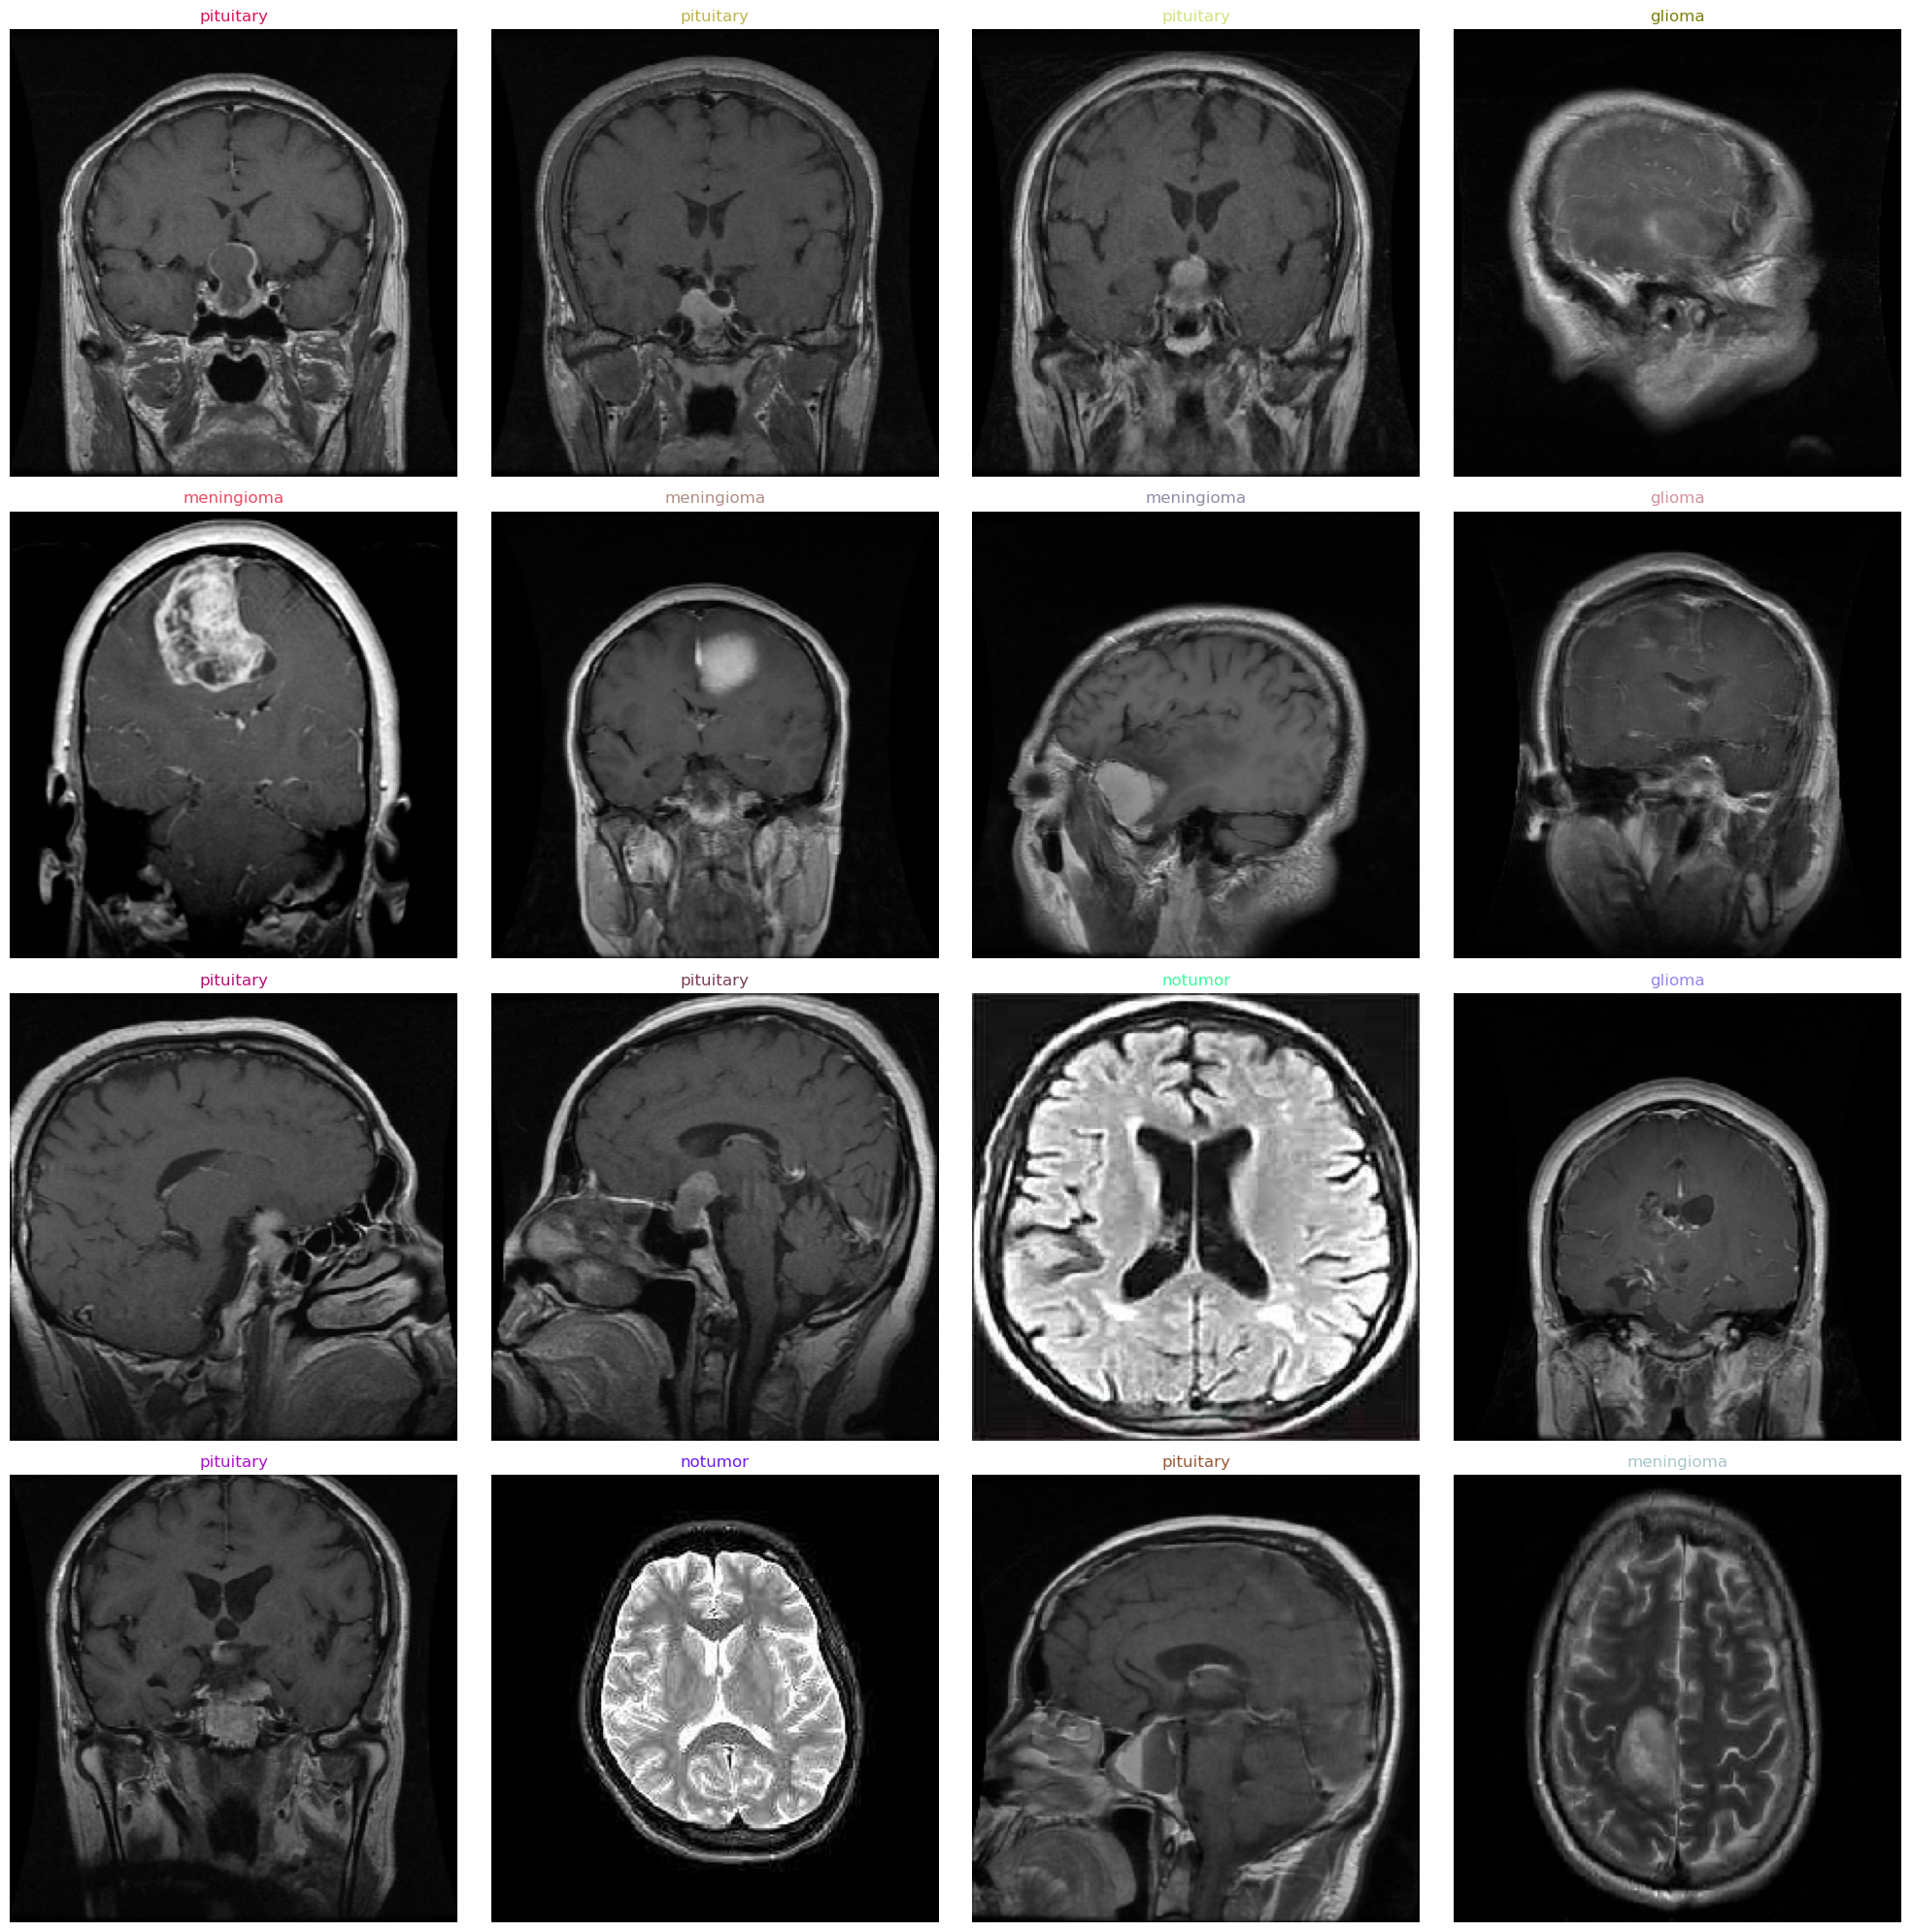

In [20]:

# Sınıf isimlerini ve görüntüleri göstermek için bir fonksiyon tanımla
def plot_image_samples(generator, classes, batch_size=16, img_scale=255, random_colors=True):
    # Görselleri ve etiketleri al
    images, labels = next(generator)
    
    # Dinamik grid boyutu ayarla
    grid_size = int(np.ceil(np.sqrt(batch_size)))
    plt.figure(figsize=(grid_size * 5, grid_size * 5))
    
    for i in range(batch_size):
        plt.subplot(grid_size, grid_size, i + 1)
        
        # Görseli normalize et ve göster
        image = images[i] / img_scale
        plt.imshow(image)
        
        # Etiketin indeksini al ve sınıf adını belirle
        index = np.argmax(labels[i])
        class_name = classes[index]
        
        # Başlık için renk seçimi
        if random_colors:
            title_color = [random.random() for _ in range(3)]  # Rastgele bir RGB rengi oluştur
        else:
            title_color = 'blue'
        
        # Başlık ve eksen ayarları
        plt.title(class_name, color=title_color, fontsize=12)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Sınıfların adlarını tanımla
class_dict = train_generator.class_indices
classes = list(class_dict.keys())

# Fonksiyonu çağır
plot_image_samples(train_generator, classes)

## Build Model

In [23]:
# Define image size and number of classes
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_generator.class_indices.keys()))  # Determine number of classes

# Load the ResNet50 base model (pretrained, excluding the top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=img_shape)
base_model.trainable = False  # Freeze pretrained layers to retain learned features

# Define the new model layers
model = Sequential([
    base_model,                    # ResNet50 base model
    Flatten(),                     # Flatten the output to a 1D vector
    Dense(256, activation="relu"), # New dense layers
    Dropout(0.5),                  # Dropout to reduce overfitting
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(class_count, activation="softmax")  # Output layer for classification
])

# Compile the model
model.compile(optimizer=Adamax(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Display model summary
model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 38s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,294,788 (188.04 MB)

 Trainable params: 25,707,076 (98.06 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [25]:
# After defining the model with ResNet50, start the training process
history = model.fit(
    train_generator,              # Training dataset
    epochs=10,                    # Total number of epochs
    verbose=1,                    # Output level (1: detailed, 0: quiet)
    validation_data=valid_generator,  # Validation data
    shuffle=False                 # Data order
)
history

Epoch 1/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 395s 1s/step - accuracy: 0.5104 - loss: 10.1172 - val_accuracy: 0.8000 - val_loss: 0.7821
Epoch 2/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.6776 - loss: 0.9429 - val_accuracy: 0.8366 - val_loss: 0.6149
Epoch 3/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 363s 1s/step - accuracy: 0.7195 - loss: 0.8022 - val_accuracy: 0.8351 - val_loss: 0.5599
Epoch 4/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.7632 - loss: 0.6895 - val_accuracy: 0.8626 - val_loss: 0.5172
Epoch 5/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 499s 1s/step - accuracy: 0.7973 - loss: 0.5913 - val_accuracy: 0.8977 - val_loss: 0.3818
Epoch 6/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.8099 - loss: 0.5710 - val_accuracy: 0.8992 - val_loss: 0.3747
Epoch 7/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 400s 1s/step - accuracy: 0.8440 - loss: 0.4606 - val_accuracy: 0.8977 - val_loss: 0.3503
Epoch 8/10
357/357 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.8501 - loss: 0.4385 - val_acc

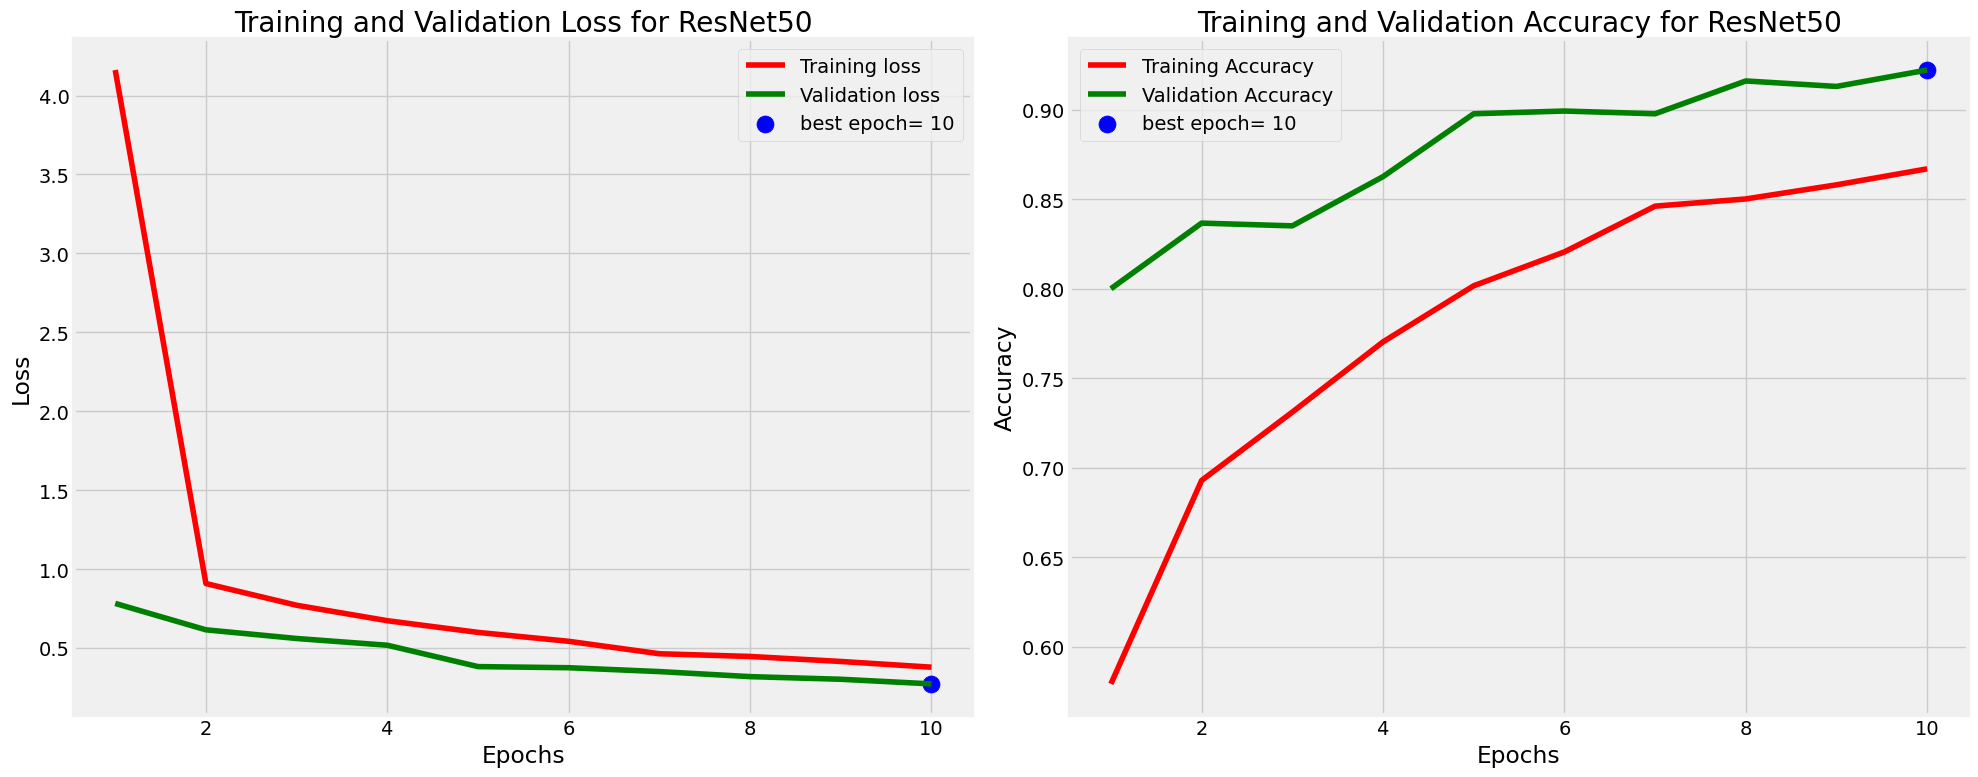

In [28]:
# Extract metrics from ResNet50 training history
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

# Epochs for plotting
Epochs = [i + 1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label='Training loss')
plt.plot(Epochs, val_loss, 'g', label='Validation loss')
plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
plt.title('Training and Validation Loss for ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
plt.title('Training and Validation Accuracy for ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluate Model 

In [30]:
# Evaluate ResNet50 model on train, validation, and test sets
train_score = model.evaluate(train_generator, verbose=1)
valid_score = model.evaluate(valid_generator, verbose=1)
test_score = model.evaluate(test_generator, verbose=1)

# Print scores
print("ResNet50 Training Performance:")
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("ResNet50 Validation Performance:")
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("ResNet50 Test Performance:")
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])


357/357 ━━━━━━━━━━━━━━━━━━━━ 295s 828ms/step - accuracy: 0.9671 - loss: 0.1337
41/41 ━━━━━━━━━━━━━━━━━━━━ 36s 866ms/step - accuracy: 0.9154 - loss: 0.2751
41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 838ms/step - accuracy: 0.9214 - loss: 0.2372
ResNet50 Training Performance:
Train Loss:  0.14057447016239166
Train Accuracy:  0.9628851413726807
--------------------
ResNet50 Validation Performance:
Validation Loss:  0.2722589373588562
Validation Accuracy:  0.9221373796463013
--------------------
ResNet50 Test Performance:
Test Loss:  0.23896008729934692
Test Accuracy:  0.9298780560493469


## Get Predictions

In [33]:
# Predict with ResNet50 on test set
preds = model.predict(test_generator)  # Example output: [0.00001, 95.12312, 0.0021, 3.12313]
y_pred = np.argmax(preds, axis=1)


41/41 ━━━━━━━━━━━━━━━━━━━━ 34s 797ms/step


## Confusion Matrix

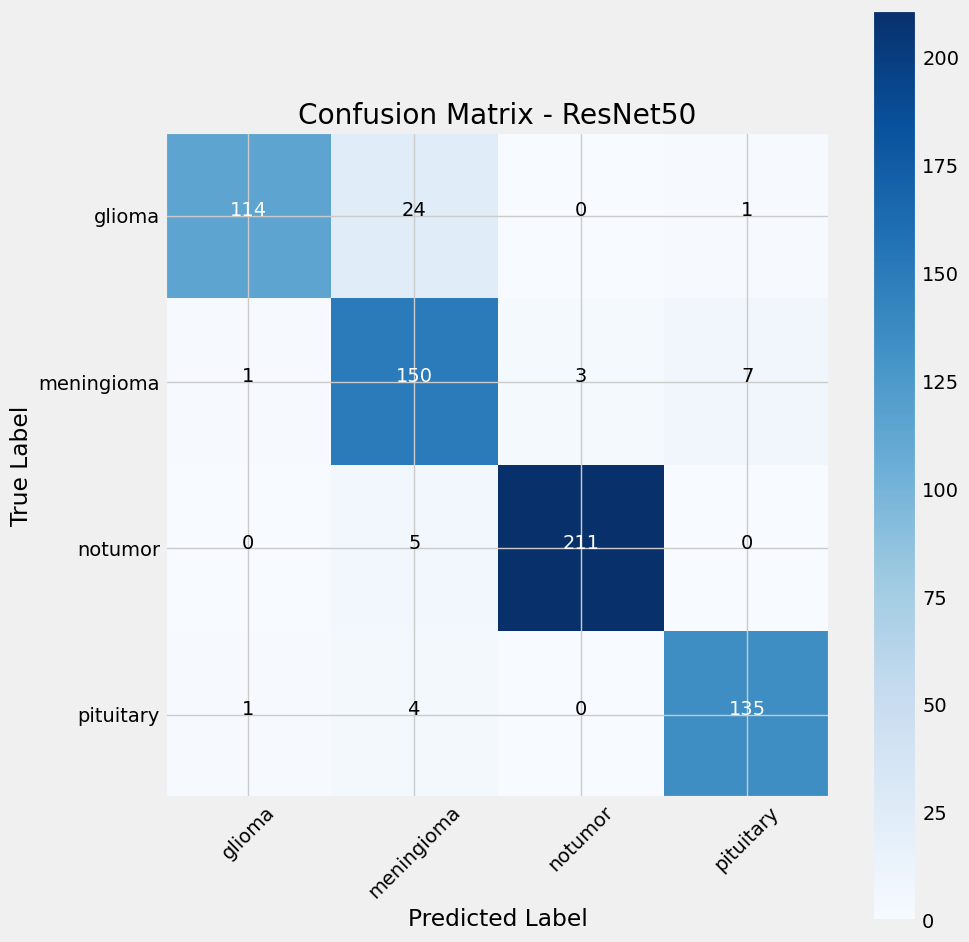

In [36]:
# Assuming `g_dict`, `classes`, `y_pred`, and `test_generator` are already defined
g_dict = test_generator.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - ResNet50')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotating the confusion matrix
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Classification Report

In [39]:
# Printing the classification report for ResNet50 predictions
print("Classification Report - ResNet50")
print(classification_report(test_generator.classes, y_pred, target_names=classes))

Classification Report - ResNet50
              precision    recall  f1-score   support

      glioma       0.98      0.82      0.89       139
  meningioma       0.82      0.93      0.87       161
     notumor       0.99      0.98      0.98       216
   pituitary       0.94      0.96      0.95       140

    accuracy                           0.93       656
   macro avg       0.93      0.92      0.93       656
weighted avg       0.94      0.93      0.93       656

